# Project: Investigate a Dataset - [Patients-NoShow-appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### Dataset Description 

> This CSV file has a dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.
● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.
● ‘Neighborhood’ indicates the
location of the hospital.
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.
● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes'if they do not show up.

In [1]:
#importing the packages we need 
import numpy as np
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
'''
Load the data and print out first 5 lines. Perform operations to inspect data types 
and look for instances of missing or possibly errant data.
'''
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#Explore data shape
df.shape

(110527, 14)

So, the data contains 14 columns and 110527 rows.

In [4]:
#any missing values of issues
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


So, There is no missing values.

In [5]:
#Check the duplication or null
df.duplicated().any()

False

No duplicated data.

In [6]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There is no null.

In [7]:
#Get some data information
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning
 

> #### Check all the columns if there are any wrong data.

In [8]:
(df.Age<=0).any()

True

That means there is an age in negative and we need to remove it.

In [9]:
df = df[(df.Age >= 0)]

After removing it.

In [10]:
print((df.Age.unique()))

[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99]


In [11]:
df.Gender.unique() 

array(['F', 'M'], dtype=object)

Gender has no problrm (no  values except Male and Female).

In [12]:
print(df.Hipertension.unique() )
print(df.Diabetes.unique()  )
print(df.Alcoholism.unique() )
print(df.Handcap.unique()  )

[1 0]
[0 1]
[0 1]
[0 1 2 3 4]


All other columns have no problrm.

In [13]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [14]:
#Correct wrong column name spelling
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.rename(columns={'No-show':'Noshow'},inplace=True)

In [15]:
#Remove the unnecessaries
df.drop(['PatientId','AppointmentID', 'ScheduledDay', 'AppointmentDay'],axis=1,inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
df.shape

(110526, 10)

<a id='eda'></a>
## Exploratory Data Analysis

> #### After cleaning and triming, now the statistics and visualization 


### General

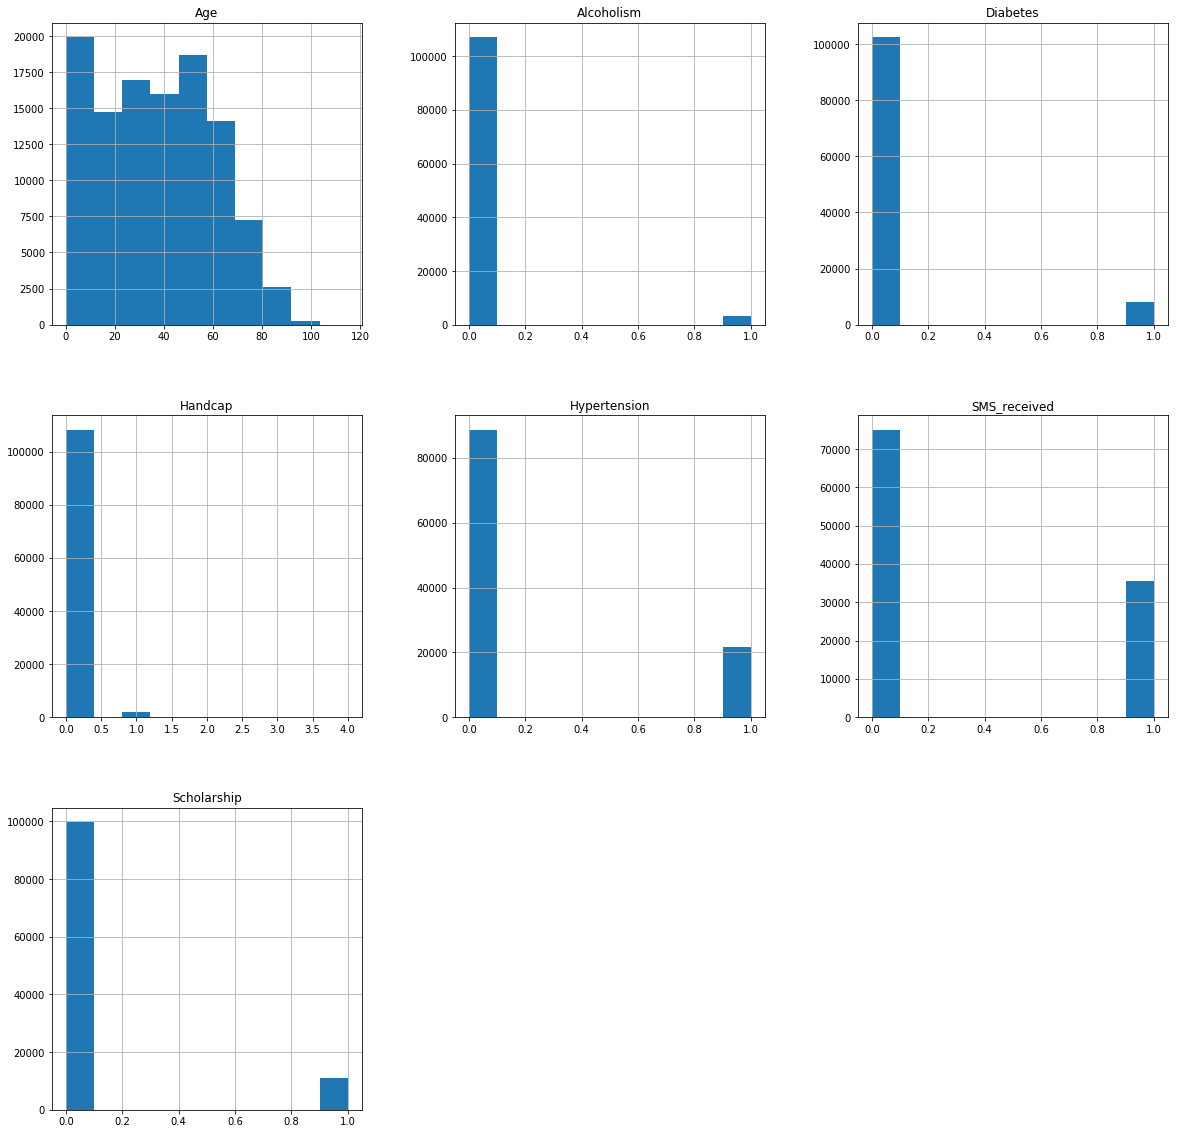

In [17]:
df.hist(figsize=(20,20));

Out of 110526 patients around 90,000 of them have showed up and that's about 80%.

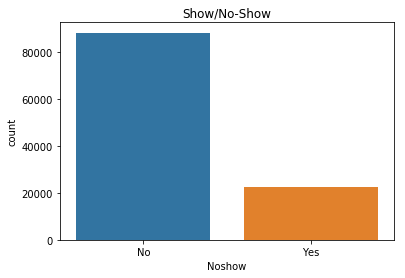

In [19]:
ax = snb.countplot(x=df.Noshow, data=df)
ax.set_title("Show/No-Show")
plt.show()

### Analyzing other characteristics:
> ##### What factors are effective to predict if the patient will show up for their scheduled appointment or not?

## 1. Gender:
Out of the 90,000 patients that appeared, about 60,000 are female and 30,000 are male. 
And out of the 20,519 patients who didn't show up, about 12,500 are females and 8,000 are males.

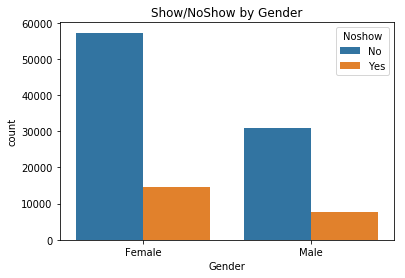

In [31]:
ax = snb.countplot(x=df.Gender, hue=df.Noshow, data=df)
ax.set_title("Show/NoShow by Gender")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

## 2. Age:
It looks different ratio at each age, but the Ages = 0,1 are the most.

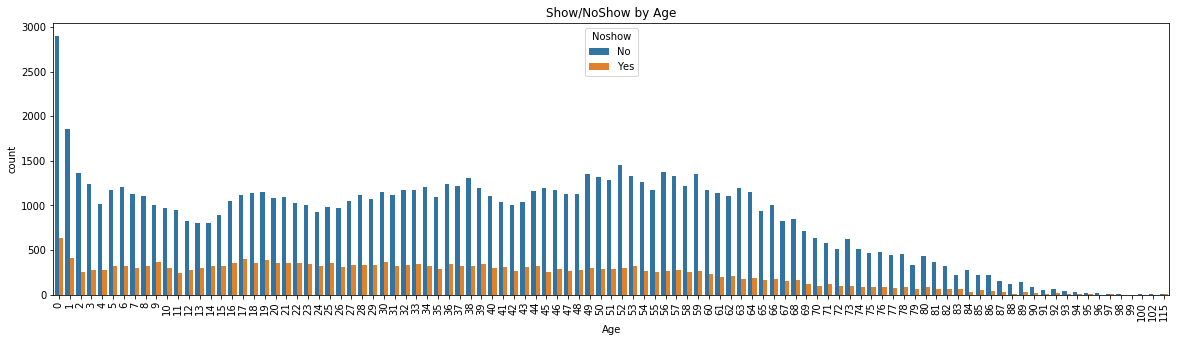

In [30]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax = snb.countplot(x=df.Age, hue=df.Noshow)
ax.set_title("Show/NoShow by Age")
plt.show()

## 3. Neighbourhood:
It looks different for each Neighbourhood, but the most is Jardim Camburi.

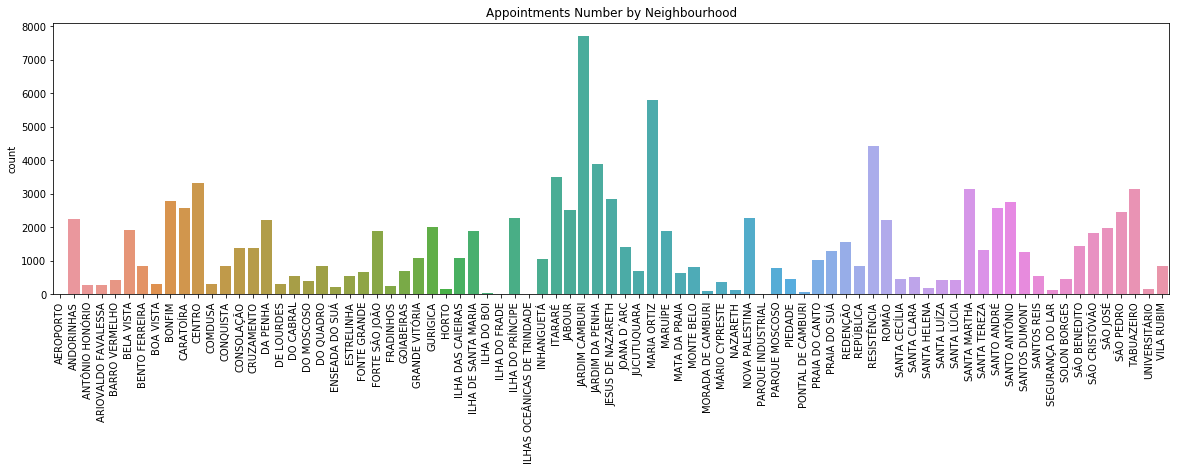

In [32]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax = snb.countplot(x=np.sort(df.Neighbourhood))
ax.set_title("Appointments Number by Neighbourhood")
plt.show()

## 4. Scholarship:
More than 80,000 patients are without Scholarship and out of them about 20,000 have showed up. 
Out of the 12,500 patients with Scholarship about 5,000 of them have showed up.

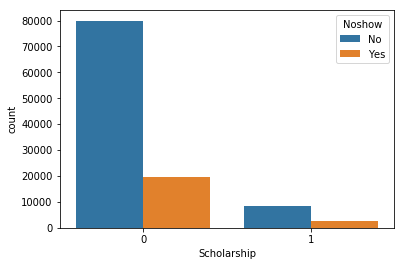

In [33]:
x = snb.countplot(x=df.Scholarship, hue=df.Noshow, data=df)
ax.set_title("Show/NoShow for Scholarship")
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

## 5. Hypertension:
More than 70,000 patients have high Hypertension, about 20,000 of them have showed up. Out of the 20,000 patients who don't have high Hypertension, about 50,000 have showed up.

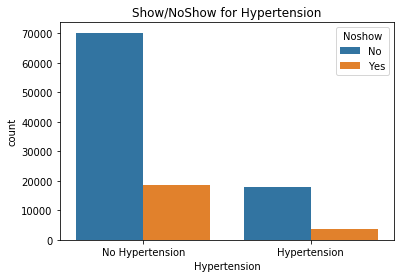

In [25]:
ax = snb.countplot(x=df.Hypertension, hue=df.Noshow, data=df)
ax.set_title("Show/NoShow for Hypertension")
x_ticks_labels=['No Hypertension', 'Hypertension']
ax.set_xticklabels(x_ticks_labels)
plt.show()

## 6. Diabetes:
More than 80,000 patients have No Diabetes, about 20,000 of them have showed up. Out of the 8,000 patients who have Diabetes, about 2,000 have showed up.

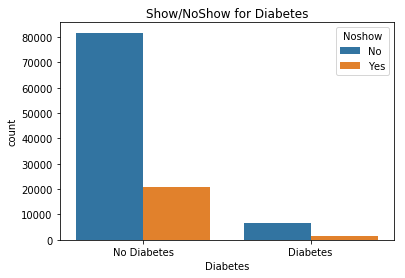

In [26]:
ax = snb.countplot(x=df.Diabetes, hue=df.Noshow, data=df)
ax.set_title("Show/NoShow for Diabetes")
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.show()

## 7. Alcoholism:
More than 90,000 patients are Not Alcoholism, about 20,000 of them have showed up. Out of the 5,000 patients who have Diabetes, about 1,000 have showed up.

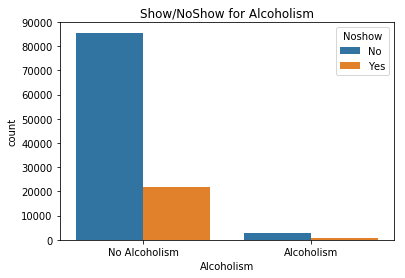

In [27]:
ax = snb.countplot(x=df.Alcoholism, hue=df.Noshow, data=df)
ax.set_title("Show/NoShow for Alcoholism")
x_ticks_labels=['No Alcoholism', 'Alcoholism']
ax.set_xticklabels(x_ticks_labels)
plt.show()

## 8. Handcap:
More than 90,000 patients have handcap, about 20,000 of them have showed up. There are 0,1,2,... are different levels of disability.

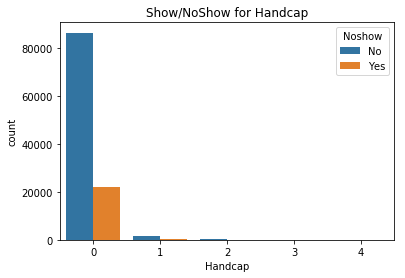

In [28]:
ax = snb.countplot(x=df.Handcap, hue=df.Noshow, data=df)
ax.set_title("Show/NoShow for Handcap")
plt.show()

## 9.  SMS Received:
More than 60,000 patients have Not Received a SMS, about 15,000 of them have showed up. Out of the 25,000 patients who have Diabetes, about 10,000 have showed up.

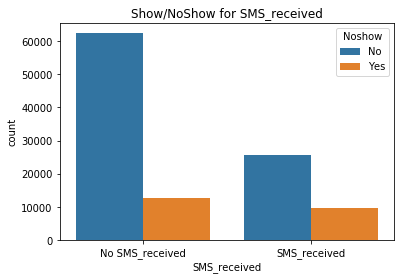

In [29]:
ax = snb.countplot(x=df.SMS_received, hue=df.Noshow, data=df)
ax.set_title("Show/NoShow for SMS_received")
x_ticks_labels=['No SMS_received', 'SMS_received']
ax.set_xticklabels(x_ticks_labels)
plt.show()

<a id='conclusions'></a>
## Conclusions
> From the histograms we can deduce that some characteristics are affective more than others, and some columns were not affective at all so, we removed it, as ('PatientId','AppointmentID', 'ScheduledDay', 'AppointmentDay').
The affective parameters - which have a good percentage comapring to the show up results - are ('Gender', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMS_received'). The parametrs which have no big effect are ('Age', 'Neighbourhood', 'Handcap')
